In [1]:
import sys
sys.path.append("G:/DREAM/from_github/PAMFluo")  # path contains python_file.py

from VoltageIntensityClass import VoltageIntensity
import pandas as pd
import numpy as np
import alienlab.utils
import matplotlib.pyplot as plt
from tkinter.filedialog import askopenfilename, askopenfilenames, askdirectory
import alienlab.plot
from alienlab.utils import *
from alienlab.regression_func import *
import json
#from VoltageIntensityClass import VoltageIntensity
import os
from scipy import optimize
import glob
import os

from mvgavg import mvgavg

import pwlf
%matplotlib inline
#ipympl
p = alienlab.plot.PlotFigure()
p.extension = ".pdf"
p.date = False
p.save_folder = "G:\DREAM/from_github\PAMFluo\Validation/biophysical_validation"
p.figsize = (10,10)
p.fontsize = 18
p.fonttick = 12

In [2]:
#direc =askdirectory(initialdir="G:/DREAM/from_github/PAMFluo/Experiments")#
direc = "G:/DREAM/from_github/PAMFluo/Experiments/2021-10-14-IBPC_loop_CC_124_TP_minimum_petri"
print(direc)

G:/DREAM/from_github/PAMFluo/Experiments/2021-10-14-IBPC_loop_CC_124_TP_minimum_petri


In [3]:
level_ref = "G:/DREAM/from_github/PAMFluo/specs/config_black.json"

with open(level_ref, 'r') as file:
    black_level = json.load(file)

    fluo_min = black_level["ai1"][1]
    
    print("minimal level of fluorescsence", fluo_min)
    
    intensity_min = black_level["ai0"][1]
    print("minimal level of intensity",  intensity_min)
        

minimal level of fluorescsence 0.0013973342018303138
minimal level of intensity 0.013942900247945813


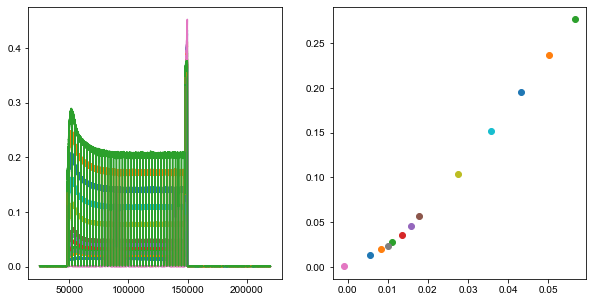

In [4]:
data = {}
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

for i, exp in enumerate(glob.glob(direc+"/*/")):
    if i>1 and i !=10:
        file = glob.glob(exp+ "/*output_plot.csv*")

        df = pd.read_csv(file[0])
        data[i] = df
        FD_curve = df['voltage (V) fluorescence'][50000:52000]
        I_curve = df['voltage (V) intensity'][50000:52000]
        FD = FD_curve.mean()
        I = I_curve.mean()
        #if FD/I > 0: 
        #    plt.plot(I, FD/I, '.')    
        #axs[0][0].loglog(i, FD, '.')
        #axs[0][1].loglog(i, I, '.')
        axs[0].plot( df['voltage (V) fluorescence'][25000:])#130000])
        axs[1].plot(I, FD, 'o')

In [5]:
V = VoltageIntensity(folder = "G:/DREAM/from_github/PAMFluo/Experiments/2021-11-03_15_54_bode_diagram/")
#V = VoltageIntensity(folder = "G:/DREAM/from_github/PAMFluo/Experiments/2022-01-25_16_23_bode_diagram/")
print(V.get_intensity_voltage('blue', 1, 30/100 )*1e6)

NN = 8
filter_list = np.array([2]*NN + [1]*NN)
limits_blue = np.array(list(np.linspace(0, 450, NN))+list(np.linspace(0, 450, NN)))

24.788746643335642



# FD and FD/I

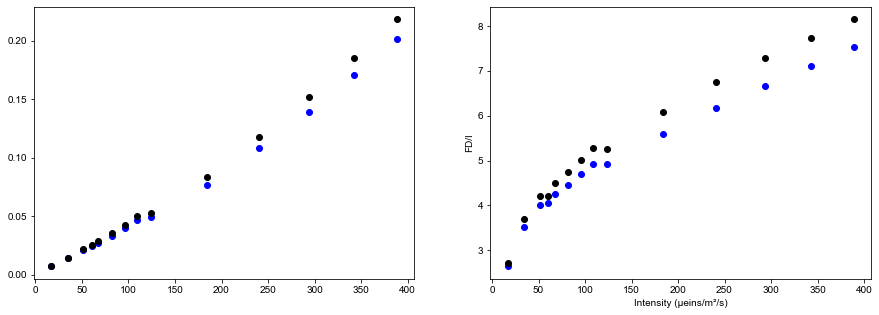

In [6]:
data = {}
intensity_exp = []
FDI = []
FDI1 = []
fig, axs = plt.subplots(1, 2, figsize=(15, 5))


for i, exp in enumerate(glob.glob(direc+"/*/")):
    if limits_blue[i]!=0:
        file = glob.glob(exp+ "/*output_plot.csv*")
        if limits_blue[i] == 0:
            iv = 0
        else:
            iv=  V.get_intensity_voltage('blue', filter_list[i], limits_blue[i]/100 )*1e6
        df = pd.read_csv(file[0])
        data[i] = df
        FD_curve = np.array(df['voltage (V) fluorescence'])
        I_curve = np.array(df['voltage (V) intensity'])
        FD1 = np.mean(FD_curve[50500:95500])
        FD = np.mean(FD_curve[124500:147000])
        I = I_curve.mean()
        
        axs[0].plot(iv, np.mean(FD), 'bo', label = "decay")
        axs[0].plot(iv, np.mean(FD1), 'ko', label = "bump")
        
        axs[1].plot(iv, np.mean(FD)/I, 'bo')
        axs[1].plot(iv, np.mean(FD1)/I, 'ko')
        
        

        plt.xlabel("Intensity (µeins/m²/s)")
        plt.ylabel("FD/I")
        FDI.append(FD/I)
        FDI1.append(FD1/I)
        intensity_exp.append(iv)
plt.show()

# PAM param

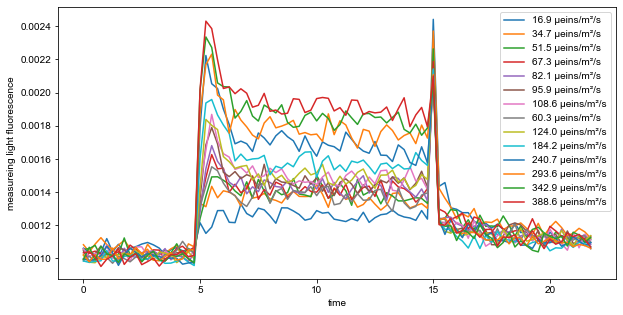

In [7]:
fm = []
f0 = []
fs = []
fs1 = []


plt.figure(figsize = (10, 5))
for i, exp in enumerate(glob.glob(direc+"/*/")):
    if limits_blue[i]!=0:
        if limits_blue[i] == 0:
            iv = 0
        else:
            iv=  V.get_intensity_voltage('blue', filter_list[i], limits_blue[i]/100 )*1e6
        file = glob.glob(exp+ "/*IBPC_pulse.csv*")
        df = pd.read_csv(file[0])
        x = df['pulse number pulse_mean']
        y = df['voltage pulse_mean']
        plt.plot(x/4, y, label = "%0.1f µeins/m²/s"%iv)
        plt.xlabel("time")
        plt.ylabel('measureing light fluorescence')
        
        fm.append(y[60])
        f0.append(np.mean(y[0:15]))
        fs.append(np.mean(y[50:59]))
        fs1.append(np.mean(y[21:40]))
plt.legend()
plt.show()

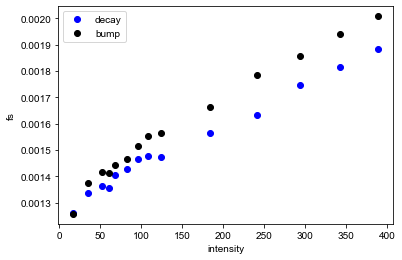

In [8]:
FDI = np.array(FDI)
fs = np.array(fs)
fs1 = np.array(fs1)
fm = np.array(fm)
f0 = np.array(f0)
#plt.plot(FDI/FDI.max())
plt.figure()
plt.plot(intensity_exp, fs, "bo", label = 'decay')
plt.plot(intensity_exp, fs1, 'ko', label = "bump")
plt.xlabel("intensity")
plt.ylabel('fs')
plt.legend()

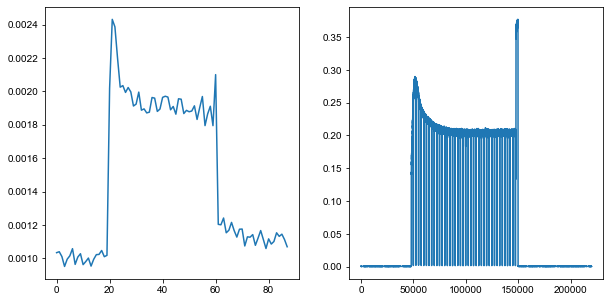

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].plot(y)

axs[1].plot(FD_curve)
plt.show()

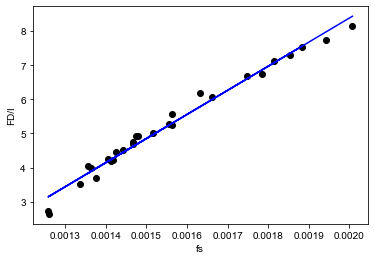

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


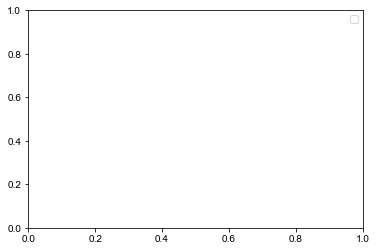

In [10]:
plt.figure()

#FDIreg, a, b, s = regression_affine(fs, FDI)
#plt.plot(fs, FDI, 'bo', label = 'decay')
#plt.plot(fs, FDIreg, 'b-', label = "r²=%0.3f"%s.rsquared)

#FDI1reg, a, b, s = regression_affine(fs1, FDI1)
#plt.plot(fs1, FDI1, 'ko', label = 'bump')
#plt.plot(fs1, FDI1reg, 'b-', label = "r²=%0.3f"%s.rsquared)


fs2 = np.concatenate([fs, fs1])
FDI2 = np.concatenate([FDI, FDI1])
FDI2reg, a, b, s = regression_affine(fs2, FDI2)
plt.plot(fs2, FDI2, 'ko')
plt.plot(fs2, FDI2reg, 'b-', label = "r²=%0.3f"%s.rsquared)

plt.xlabel("fs")
plt.ylabel("FD/I")
plt.show()
plt.legend()

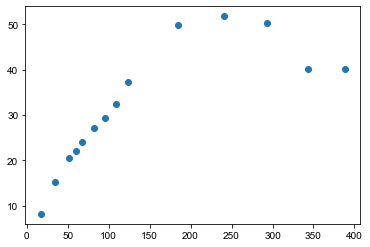

In [11]:
plt.figure()
plt.plot(intensity_exp, (fm-fs)/fm*intensity_exp, "o")

In [12]:
regression_linear(fs, FDI)

(array([4.26605075, 4.52275354, 4.61867395, 4.75280524, 4.82687507,
        4.9610066 , 5.0032146 , 4.58730883, 4.98928109, 5.29136758,
        5.52267   , 5.9133922 , 6.14362237, 6.37235077]),
 array([3384.12833655]),
 <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x1ef0f705a90>)

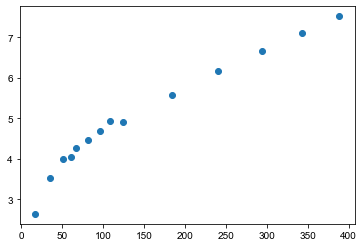

In [13]:
plt.figure()
plt.scatter(intensity_exp, FDI)